<a href="https://colab.research.google.com/github/Cioffy/HeartGuard/blob/main/MachineLearningExam_Pollaccia_Tortolini_HeartGuard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HeartGuard
Taking care of people's heart health with Machine Learning  
*(Course Exam)*

## Sofia Tortolini
Digital Transformation Student  
Course on Data Mining and Machine Learning  
Campus of Cesena, 2022/2023  
Email: sofia.tortolini@studio.unibo.it

## Myriam Pollaccia
Digital Transformation Student  
Course on Data Mining and Machine Learning  
Campus of Cesena, 2022/2023  
Email: myriam.pollaccia@studio.unibo.it

In [ ]:
import pandas as pd #data learning
import sklearn as sk #ml
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Analysis between different datasets

In [ ]:
#@title Rejected because the encoding of some columns was done in an ordinal way and the others column were already transformed.
#The second file contained in the previous URL is second_file - but there was also no correspondence between tables and numerical.
#https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
first_file = pd.read_csv("/content/heart_rashik.csv")
second_file = pd.read_csv("/content/o2Saturation.csv")

In [ ]:
first_file

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
second_file

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5
...,...
3580,98.6
3581,98.6
3582,98.6
3583,98.6


In [ ]:
#@title This was identical to the previous one.
#https://www.kaggle.com/datasets/nareshbhat/health-care-data-set-on-heart-attack-possibility
third_ds = pd.read_csv("/content/heart_naresh.csv")
third_ds

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Some [comments](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/discussion/231182)  on kaggle were pointing to an external [archive](http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data).

In [ ]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
import os
import requests

file_name = "processed.cleveland.data"

In [ ]:
if not os.path.exists(file_name):
    # If the file doesn't exist, download it
    response = requests.get(url)
    if response.status_code == 200:
        with open(file_name, 'wb') as f:
            f.write(response.content)
        print("File downloaded successfully.")
    else:
        print("Failed to download the file.")
else:
    print(f"{file_name} already exists in the current directory.")

File downloaded successfully.


In [ ]:
heart_cleveland = pd.read_csv(file_name, header=None,na_values=["?"])
heart_cleveland

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In the [data source](https://archive.ics.uci.edu/dataset/45/heart+disease) webpage there was a rough description of values, that was not corresponding exactly with previous datasets.

* age - age in years
* sex - sex (1 = male; 0 = female)
* cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
* chol - serum cholestoral in mg/dl
* fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
* restecg - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
* ca - number of major vessels (0-3) colored by flourosopy
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

Diagnosis of heart disease (angiographic disease status) (Value 0 = < 50% diameter narrowing; Value 1 = > 50% diameter narrowing)

In [ ]:
#According to the description before, columns were reconstructed
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
heart_cleveland.columns = column_names
heart_cleveland

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
# Check for missing values in the dataframe
missing_values = heart_cleveland.isnull()

# Count missing values for each column
missing_counts = missing_values.sum()

# Displaying the columns with missing values and their counts
print(missing_counts)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


According to what explained in the reasearch paper correlated, we have 6 value missing.

A positive thing that this dataframe has is that it does, however, contain a value (thal) [link text](https://rstudio-pubs-static.s3.amazonaws.com/701904_2ec1a4eeb9104737b7f30aea0bc6f788.html) that would actually seem to be moofully correlating for having and not having heart attacks. In fact, it represents thalassemia, consequently, it would be like investigating people with almost/surely heart attack risk.

# The dataset chosen
This dataset, on the other hand, seems to contain many more observations 918 vs. 303, which as a matter of ML application might turn out much better so as not to incur overfitting or other incorrect numerics.

However some features were no more represented as the earlier mentioned thal.

In [ ]:
#https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
complete_heartData = pd.read_csv("/content/soriano_dataset_heart.csv")
complete_heartData

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
complete_heartData.info() #to print some useful numerics on the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Learning of strange values for cholesterol: such as a 0... for some values it was decided to run a specific check.

Ref [https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/discussion/438385]

Ref [https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/discussion/303435]

Ref [https://www.healthline.com/health/cholesterol-and-heart-disease]

In [ ]:
#Learning of strange values for cholesterol: such as a 0... for some values it was decided to run a specific check
count = complete_heartData[complete_heartData['Cholesterol'] == 0].count()[0]
print(count)

172


In [ ]:
# Since there are 172 lines that given their complete eroneity it is best to drop out
complete_heartData = complete_heartData.drop(complete_heartData[complete_heartData['Cholesterol'] == 0].index)
complete_heartData

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


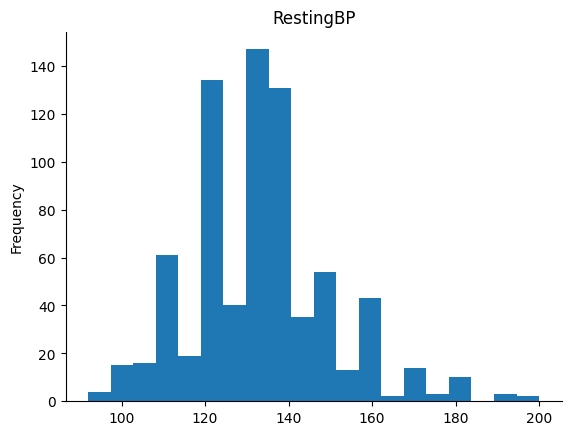

In [ ]:
#This graph is was plotted because of a consideration on the values of restingBP: blood pressure should contain two values, one for systolic and one for diastolic pressure
complete_heartData['RestingBP'].plot(kind='hist', bins=20, title='RestingBP')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# CSame check as before for missing values in the dataframe:
missing_values = complete_heartData.isnull()

# Count missing values for each column
missing_counts = missing_values.sum()

# Displaying the columns with missing values and their counts
print(missing_counts)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
complete_heartData.describe() # With this function we can understand easily the mean, min and max of data
#obviously does not include values of type object

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
#We printed the object column to think about how to convert them and understand the different values, as stated in our research paper
for column in complete_heartData.columns:
    if complete_heartData[column].dtype == 'object':
        #print(f"Column: {column}")
        print(complete_heartData[column].value_counts())
        print("\n")

M    564
F    182
Name: Sex, dtype: int64


ASY    370
NAP    169
ATA    166
TA      41
Name: ChestPainType, dtype: int64


Normal    445
LVH       176
ST        125
Name: RestingECG, dtype: int64


N    459
Y    287
Name: ExerciseAngina, dtype: int64


Flat    354
Up      349
Down     43
Name: ST_Slope, dtype: int64




In [ ]:
#@title Convert categorical variables into a numerical format
# previous datasets (303 row ones) used this encoder:
'''from sklearn.preprocessing import OrdinalEncoder
for column in complete_heartData.columns:
    if complete_heartData[column].dtype == 'object':
      ordinal_encoder = OrdinalEncoder()
      y = ordinal_encoder.fit_transform(complete_heartData[[column]])'''
#But this encoder works well if there can be a natural order (low-mid-high), which for some values (being medical) did not seem to
#be the right way.

There are a few techniquesfor this purpose, depending on the nature of  categorical data:

1. **Label Encoding**:
   - Label encoding is suitable when you have ordinal categorical data, meaning the categories have a natural order. For example, "low," "medium," and "high" can be encoded as 0, 1, and 2, respectively.

2. **One-Hot Encoding**:
   - One-hot encoding is appropriate for nominal categorical data, where there is no inherent order among categories.
   - It creates binary columns (0 or 1) for each category

3. **Target Encoding**:
   - Target encoding is useful when you have a categorical column, and you want to encode it based on the mean of the target variable for each category. This can be helpful when you suspect a correlation between the categorical variable and the target.

4. **Binary Encoding**:
   - Binary encoding combines the benefits of one-hot encoding and label encoding, reducing dimensionality compared to one-hot encoding.  

In [ ]:
# Sex column is categorical so it's easy to adjust in 0-1 exactly as ExerciseAngina
# Creating a dictionary to map the categorical values to binary values.
encoding = {"M": 0, "F": 1, "Y": 0, "N": 1}
complete_heartData["Sex"] = complete_heartData["Sex"].map(encoding)
complete_heartData["ExerciseAngina"] = complete_heartData["ExerciseAngina"].map(encoding)

'''
from sklearn import preprocessing
complete_heartData[["Sex"]] = complete_heartData[["Sex"]].apply(preprocessing.LabelEncoder().fit_transform)
complete_heartData[["ExerciseAngina"]] = complete_heartData[["ExerciseAngina"]].apply(preprocessing.LabelEncoder().fit_transform)'''

'\nfrom sklearn import preprocessing\ncomplete_heartData[["Sex"]] = complete_heartData[["Sex"]].apply(preprocessing.LabelEncoder().fit_transform)\ncomplete_heartData[["ExerciseAngina"]] = complete_heartData[["ExerciseAngina"]].apply(preprocessing.LabelEncoder().fit_transform)'

In [ ]:
complete_heartData

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,1,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,1,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,1,0.0,Up,0
3,48,1,ASY,138,214,0,Normal,108,0,1.5,Flat,1
4,54,0,NAP,150,195,0,Normal,122,1,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,TA,110,264,0,Normal,132,1,1.2,Flat,1
914,68,0,ASY,144,193,1,Normal,141,1,3.4,Flat,1
915,57,0,ASY,130,131,0,Normal,115,0,1.2,Flat,1
916,57,1,ATA,130,236,0,LVH,174,1,0.0,Flat,1


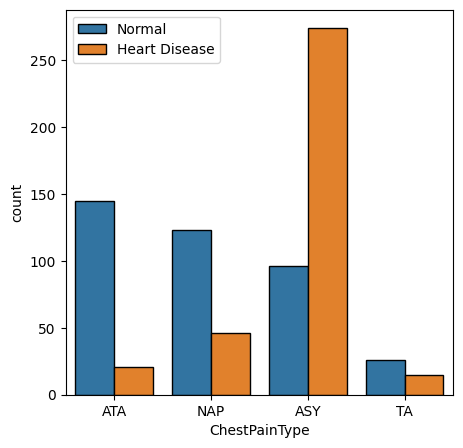

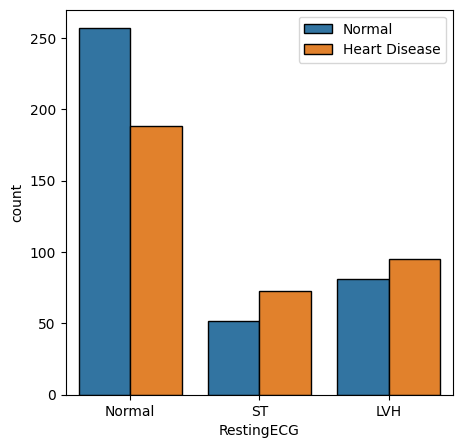

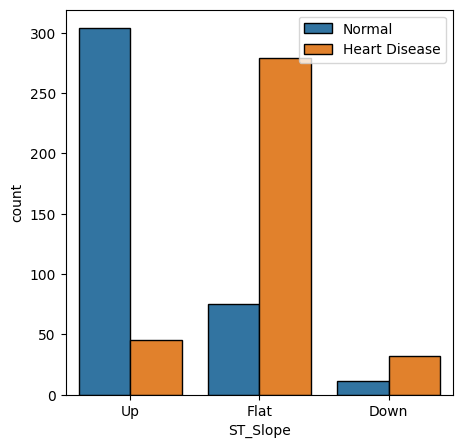

In [ ]:
#For the other columns, the issue is more complicated because they would seem to have correlation with having or not having a heart attack:
for column in complete_heartData.columns:
    if complete_heartData[column].dtype == 'object':
      plt.figure(figsize=(5,5))
      sns.countplot(x=complete_heartData[column], data=complete_heartData, hue='HeartDisease', edgecolor='black')
      plt.legend(['Normal', 'Heart Disease'])
      #plt.title("ciao")
      plt.show()

In [ ]:
!pip install category_encoders
import category_encoders as ce
from sklearn.model_selection import train_test_split

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.7 MB/s eta 0:00:00


In [ ]:
# We decided to use a target encoder since is a kind of encoding that replaces a feature's categories with some number derived from the target
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(complete_heartData, complete_heartData["HeartDisease"], test_size=0.25)

#TargetEncoder object that adress the column we want to trasnform
encoder = ce.TargetEncoder(cols=["ChestPainType", "RestingECG", "ST_Slope"])

#Fitting the TargetEncoder object
encoder.fit(X_train, y_train)

# Transforming the training and test data
X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)

#Merge the X_train_encoded and X_test_encoded dataframes into a new dataframe
encoded_features = pd.merge(X_train_encoded, X_test_encoded, how="outer")
encoded_features

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,43,1,0.794038,132,341,1,0.554054,136,0,3.0,0.818713,1
1,62,0,0.794038,152,153,0,0.634327,97,0,1.6,0.206667,1
2,57,0,0.794038,152,274,0,0.519704,88,0,1.2,0.818713,1
3,55,0,0.320755,133,185,0,0.634327,136,1,0.2,0.206667,0
4,51,0,0.794038,140,261,0,0.554054,186,0,0.0,0.206667,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,63,0,0.794038,185,0,0,0.519704,98,0,0.0,0.206667,1
914,46,1,0.794038,130,238,0,0.519704,90,1,0.0,0.206667,0
915,38,0,0.794038,110,196,0,0.519704,166,1,0.0,0.818713,1
916,41,1,0.145174,130,204,0,0.554054,172,1,1.4,0.206667,0


In [ ]:
encoded_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 745
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             746 non-null    int64  
 1   Sex             746 non-null    int64  
 2   ChestPainType   746 non-null    float64
 3   RestingBP       746 non-null    int64  
 4   Cholesterol     746 non-null    int64  
 5   FastingBS       746 non-null    int64  
 6   RestingECG      746 non-null    float64
 7   MaxHR           746 non-null    int64  
 8   ExerciseAngina  746 non-null    int64  
 9   Oldpeak         746 non-null    float64
 10  ST_Slope        746 non-null    float64
 11  HeartDisease    746 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 75.8 KB


In [ ]:
#before splitting the dataset it's better to don't process data in order, but to shuffle them casually:
df_shuffled = encoded_features.sample(frac=1).reset_index(drop=True)
df_shuffled

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,39,0,0.320755,120,339,0,0.519704,170,1,0.0,0.206667,0
1,40,0,0.320755,130,281,0,0.519704,167,1,0.0,0.206667,0
2,69,0,0.462078,160,234,1,0.554054,131,1,0.1,0.818713,0
3,62,0,0.462078,120,0,1,0.554054,134,1,-0.8,0.818713,1
4,50,1,0.794038,160,0,1,0.519704,110,1,0.0,0.818713,1
...,...,...,...,...,...,...,...,...,...,...,...,...
913,50,0,0.320755,129,196,0,0.519704,163,1,0.0,0.206667,0
914,38,0,0.462078,120,231,0,0.519704,182,0,3.8,0.818713,1
915,49,0,0.320755,140,187,0,0.519704,172,1,0.0,0.206667,0
916,50,0,0.794038,145,264,0,0.519704,150,1,0.0,0.818713,1


In [ ]:
X = df_shuffled.drop('HeartDisease', axis=1)
y = df_shuffled['HeartDisease']
# Split the DataFrame into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df_shuffled[['Age','Sex','ChestPainType','RestingBP','Cholesterol', 'FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']], df_shuffled['HeartDisease'], test_size=0.15, stratify=df_shuffled['HeartDisease']
)
print(X_train.shape)
print(X_test.shape)

(780, 11)
(138, 11)


In [ ]:
'''X_validation, X_test, y_validation, y_test = train_test_split(
    X_test, y_test, test_size=0.5, stratify=y_test
)'''

# Machine Learning Algorithm on dataset
1. (done) SVM
2. (done) Random forest
3. (done) ADA boost
4. (done) K-neighbour
5. (done) Decision tree
6. (done) Gaussian nb

# Evaluation

## Accuracy
Accuracy is the simplest metric and can be defined as the number of test cases correctly classified divided by the total number of test cases.

It can be applied to most generic problems but is not very useful when it comes to unbalanced datasets.

## Precision
Precision is the metric used to identify the correctness of classification.

Intuitively, this equation is the ratio of correct positive classifications to the total number of predicted positive classifications. The greater the fraction, the higher is the precision, which means better is the ability of the model to correctly classify the positive class.

## Recall
Recall tells us the number of positive cases correctly identified out of the total number of positive cases.

## F1 Score
F1 score is the harmonic mean of Recall and Precision and therefore, balances out the strengths of each.

## AUC-ROC
ROC curve is a plot of true positive rate (recall) against false positive rate (TN / (TN+FP)). AUC-ROC stands for Area Under the Receiver Operating Characteristics and the higher the area, the better is the model performance.

If the curve is somewhere near the 50% diagonal line, it suggests that the model randomly predicts the output variable.

## Confusion matrix

The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
def eval_model(y_test,y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  print(f'Accuracy: {accuracy}')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1-Score: {f1}')

def eval_model_synthetic(y_test,y_pred):
  print(classification_report(y_test, y_pred))

def show_graph_ROCAUC(classifier,X_test, y_test):
  svc_disp = RocCurveDisplay.from_estimator(classifier, X_test, y_test)

def show_graph_confMATRIX(classifier,X_test,y_test):
  titles_options = [
      ("Confusion matrix, without normalization", None),
      ("Normalized confusion matrix", "true"),
  ]
  for title, normalize in titles_options:
      disp = ConfusionMatrixDisplay.from_estimator(
          classifier,
          X_test,
          y_test,
          cmap=plt.cm.Blues,
          normalize=normalize,
      )
      disp.ax_.set_title(title)

      #print(title)
      #print(disp.confusion_matrix)

  plt.show()

In [ ]:
'''print(classifier.score(X_validation, y_validation))'''

'print(classifier.score(X_validation, y_validation))'

# SVM
The disadvantages of support vector machines include:

* If the number of features is much greater than the number of samples, avoid
over-fitting in choosing Kernel functions and regularization term is crucial.

The 'kernel' parameter of SVC must be a str among {'poly', 'sigmoid', 'linear', 'rbf', 'precomputed'} or a callable

In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

y_pred_train = classifier.predict(X_train)

eval_model_synthetic(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.65      0.68      0.66        59
           1       0.62      0.58      0.60        53

    accuracy                           0.63       112
   macro avg       0.63      0.63      0.63       112
weighted avg       0.63      0.63      0.63       112



In [ ]:
kernels = ['poly', 'sigmoid', 'linear', 'rbf']

In [ ]:
SVM_classifier = {}
for k in kernels:
  classifier = SVC(kernel = k)

  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)

  print("SVM with kernel = ",k)
  eval_model_synthetic(y_test, y_pred)
  SVM_classifier[k]=classifier

SVM with kernel =  poly
              precision    recall  f1-score   support

           0       0.65      0.68      0.66        59
           1       0.62      0.58      0.60        53

    accuracy                           0.63       112
   macro avg       0.63      0.63      0.63       112
weighted avg       0.63      0.63      0.63       112

SVM with kernel =  sigmoid
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        59
           1       0.57      0.49      0.53        53

    accuracy                           0.58       112
   macro avg       0.58      0.58      0.57       112
weighted avg       0.58      0.58      0.58       112

SVM with kernel =  linear
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        59
           1       0.82      0.85      0.83        53

    accuracy                           0.84       112
   macro avg       0.84      0.84      0.84       1

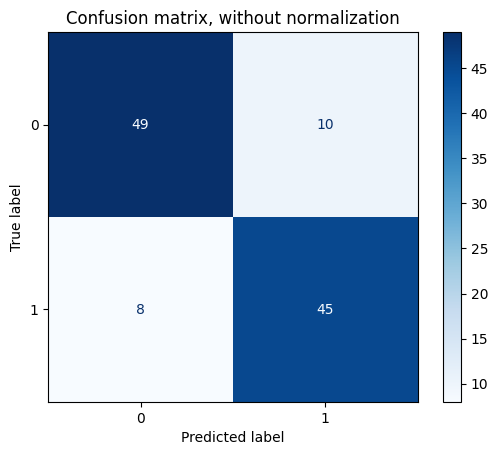

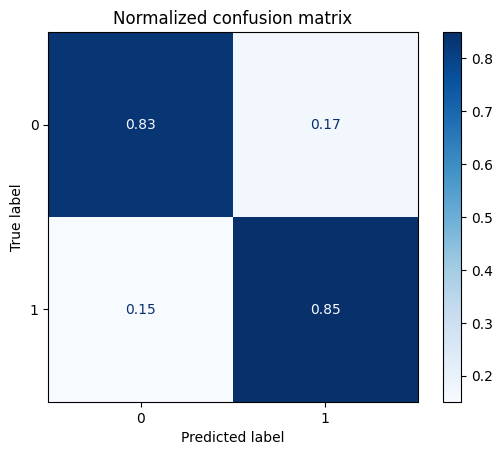

In [ ]:
show_graph_confMATRIX(SVM_classifier["linear"],X_test,y_test)

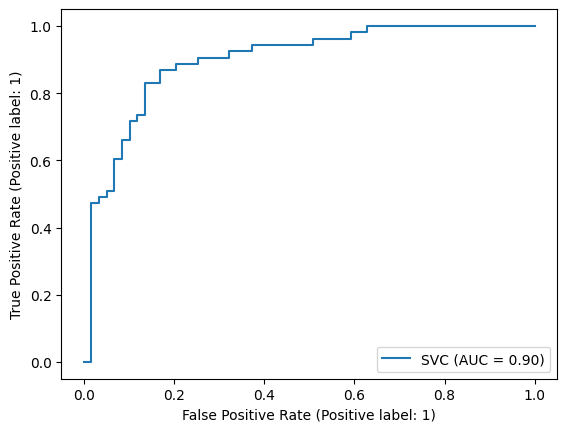

In [ ]:
show_graph_ROCAUC(SVM_classifier["linear"],X_test,y_test)

# DecisionTreeClassifier
A decision tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.

The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in a recursive manner called recursive partitioning.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

eval_model_synthetic(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        59
           1       0.84      0.79      0.82        53

    accuracy                           0.83       112
   macro avg       0.83      0.83      0.83       112
weighted avg       0.83      0.83      0.83       112



### Optimizing Decision Tree Performance
* criterion : optional (default=”gini”) or Choose attribute selection measure. This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

* splitter : string, optional (default=”best”) or Split Strategy. This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

* max_depth : int or None, optional (default=None) or Maximum Depth of a Tree. The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source)

In [ ]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=3)

dtc = dtc.fit(X_train,y_train)

y_pred = dtc.predict(X_test)

eval_model_synthetic(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.90      0.78      0.84        59
           1       0.79      0.91      0.84        53

    accuracy                           0.84       112
   macro avg       0.84      0.84      0.84       112
weighted avg       0.85      0.84      0.84       112



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'max_depth': randint(1,20)}

dtc = DecisionTreeClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(dtc,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

#Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b4ba6987eb0>})

In [ ]:
best_rf = rand_search.best_estimator_

print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 4}


In [ ]:
dtc = DecisionTreeClassifier(max_depth=4)

dtc = dtc.fit(X_train,y_train)

y_pred = dtc.predict(X_test)

eval_model_synthetic(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        59
           1       0.88      0.72      0.79        53

    accuracy                           0.82       112
   macro avg       0.83      0.82      0.82       112
weighted avg       0.83      0.82      0.82       112



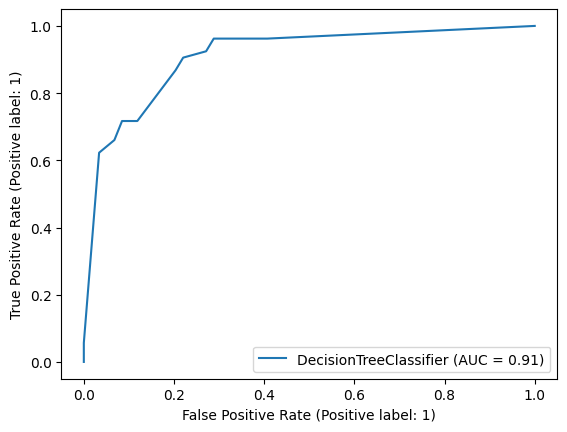

In [ ]:
show_graph_ROCAUC(dtc,X_test,y_test)

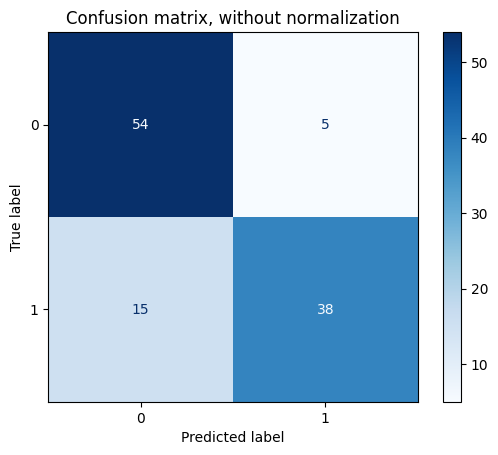

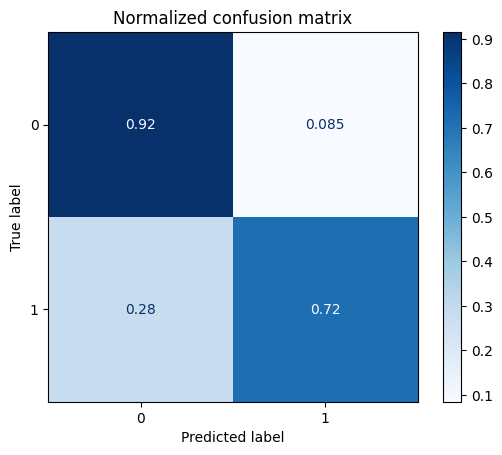

In [ ]:
show_graph_confMATRIX(dtc,X_test,y_test)

# Random forest
In a random forest classification, multiple decision trees are created using different random subsets of the data and features. Each decision tree is like an expert, providing its opinion on how to classify the data. Predictions are made by calculating the prediction for each decision tree, then taking the most popular result.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

eval_model_synthetic(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.87      0.88      0.87        59
           1       0.87      0.85      0.86        53

    accuracy                           0.87       112
   macro avg       0.87      0.87      0.87       112
weighted avg       0.87      0.87      0.87       112



In [ ]:
from sklearn.tree import export_graphviz
import graphviz #library able to design and represent the tree

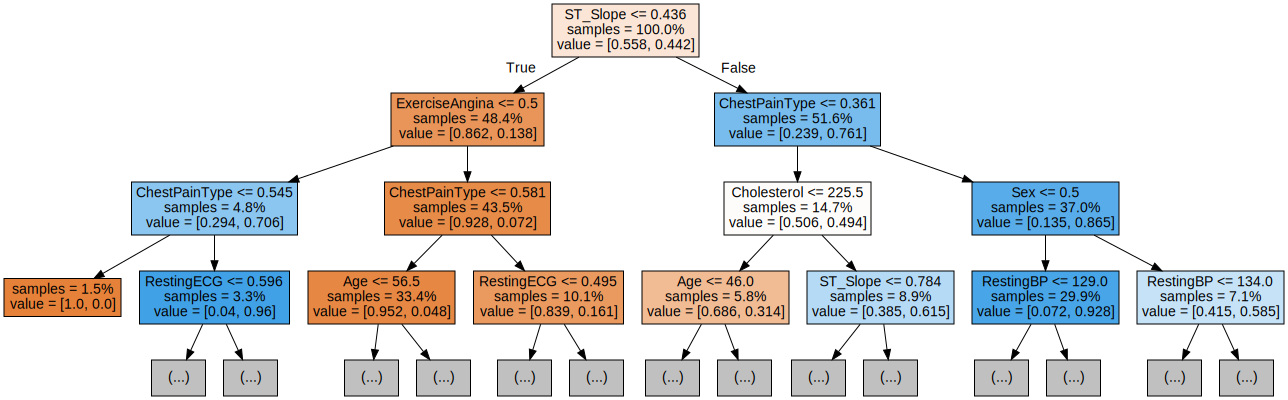

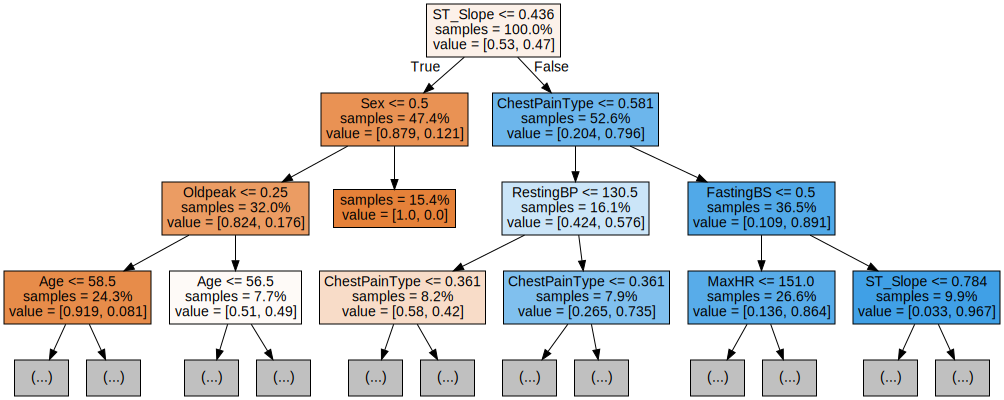

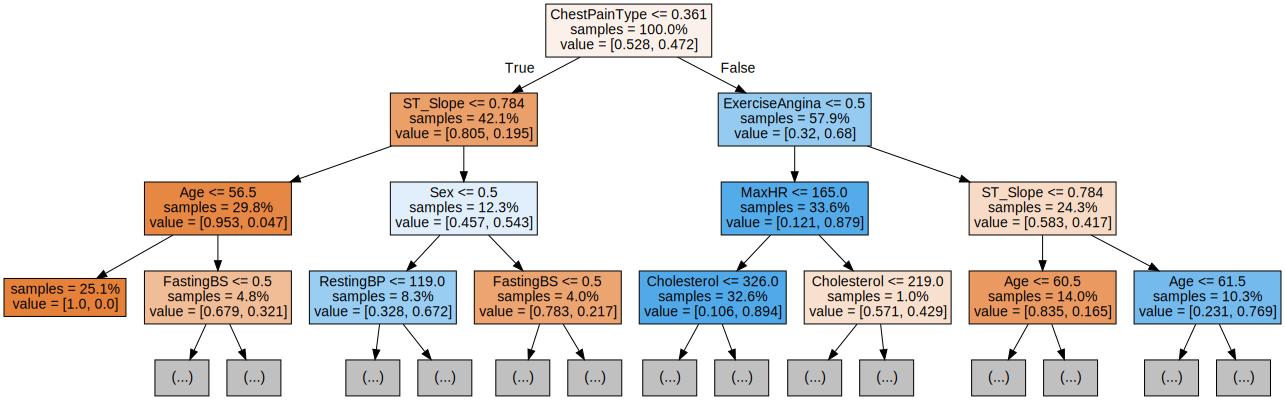

In [ ]:
for i in range(3):
    tree = clf.estimators_[i]
    ddata = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=3,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(ddata)
    display(graph)

In [ ]:
print('Parameters currently in use:\n')
print(clf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
#Since the values are pretty high in accuracy we decided to try an hyperparameters tuning with RandomizedSearchCV
#RandomizedSearchCV will train many models (defined by n_iter_ and save each one as variables, the code below creates a variable for the best model and prints the hyperparameters
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rfc = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rfc,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

#Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d558c360070>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d558bfbf640>})

In [ ]:
best_rf = rand_search.best_estimator_

print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 4, 'n_estimators': 409}


In [ ]:
clf = RandomForestClassifier(max_depth= 4, n_estimators= 409) #creation of another version of clf with the stated parameters above

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

eval_model_synthetic(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        59
           1       0.89      0.89      0.89        53

    accuracy                           0.89       112
   macro avg       0.89      0.89      0.89       112
weighted avg       0.89      0.89      0.89       112



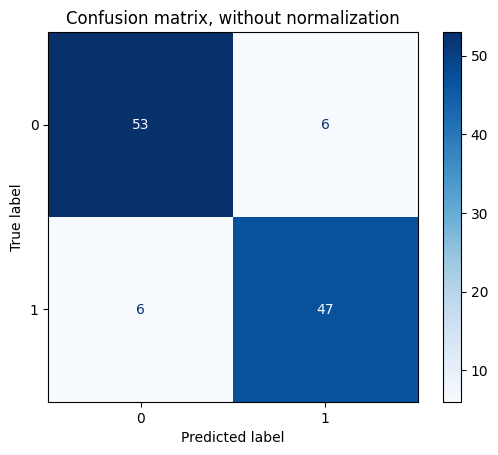

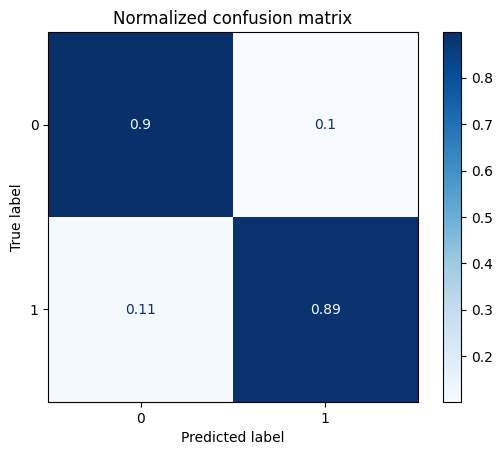

In [ ]:
show_graph_confMATRIX(clf,X_test,y_test)

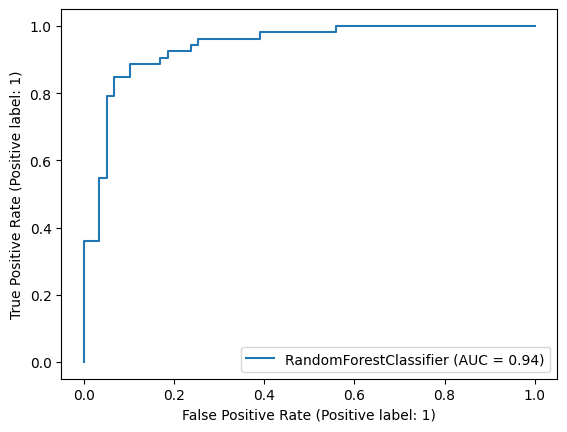

In [ ]:
show_graph_ROCAUC(clf,X_test,y_test)

#  kNN

The kNN algorithm can be considered a voting system, where the majority class label determines the class label of a new data point among its nearest ‘k’ (where k is an integer) neighbors in the feature space.

When training a kNN classifier, it's essential to normalize the features. This is because kNN measures the distance between points. The default is to use the Euclidean Distance, which is  the square root of the sum of the squared differences between two points.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) #default configuration

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

eval_model_synthetic(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        59
           1       0.83      0.81      0.82        53

    accuracy                           0.83       112
   macro avg       0.83      0.83      0.83       112
weighted avg       0.83      0.83      0.83       112



In [ ]:
#in this case the hyperparameter tuning can be on the n_neighbors
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
X = scaler.fit_transform(X)

k_values = [i for i in range (1,45)]
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)#trial with different values and then added to scores array
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

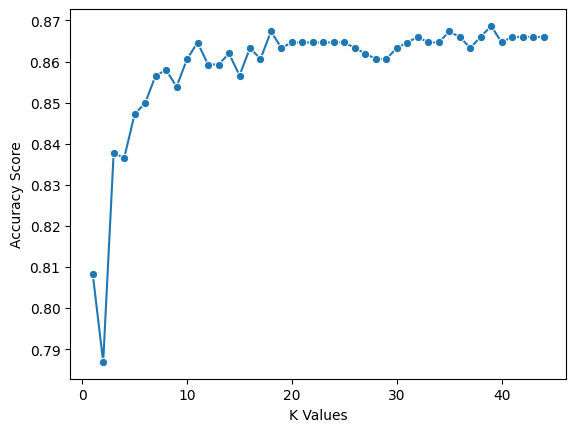

In [ ]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
knn = KNeighborsClassifier(n_neighbors=39) #default configuration

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

eval_model_synthetic(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.87      0.88      0.87        59
           1       0.87      0.85      0.86        53

    accuracy                           0.87       112
   macro avg       0.87      0.87      0.87       112
weighted avg       0.87      0.87      0.87       112



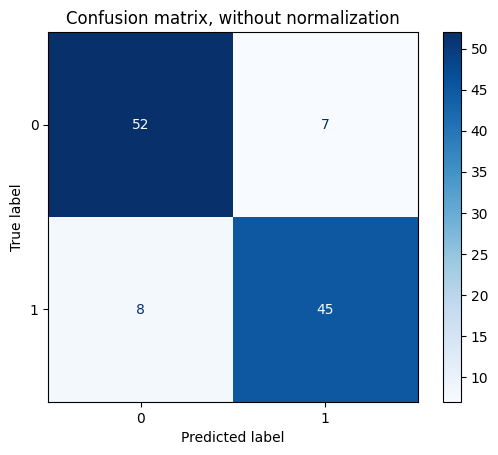

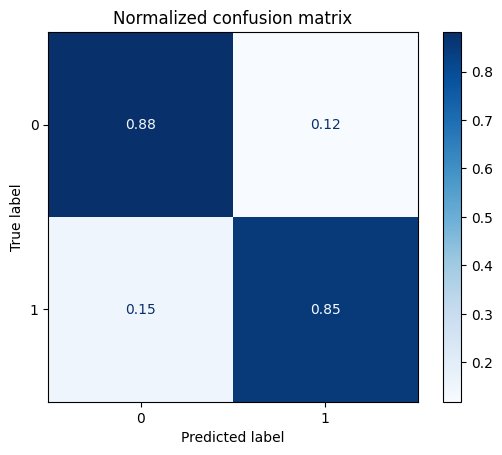

In [ ]:
#The optimal k value we think is therefore around 25
show_graph_confMATRIX(knn,X_test,y_test)

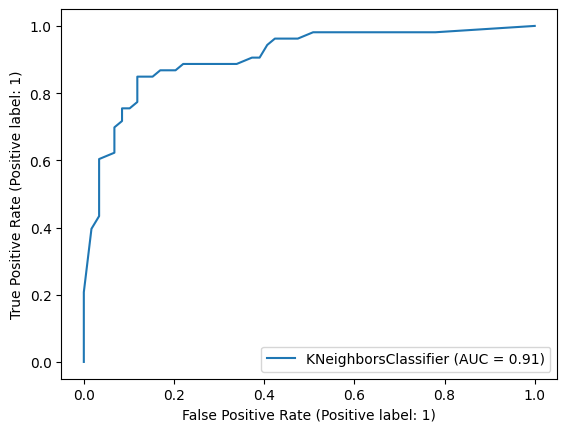

In [ ]:
show_graph_ROCAUC(knn,X_test,y_test)

# Boosting Classifier
Boosting algorithms are a set of the low accurate classifier to create a highly accurate classifier. Low accuracy classifier (or weak classifier) offers the accuracy better than the flipping of a coin. Highly accurate classifier( or strong classifier) offer error rate close to 0. Boosting algorithm can track the model who failed the accurate prediction. Boosting algorithms are less affected by the overfitting problem.

* (done) AdaBoost (Adaptive Boosting) -. The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations.
* Gradient Tree Boosting
* (done) XGBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [ ]:
ada_clf = AdaBoostClassifier(n_estimators=100) #default one

ada_clf.fit(X_train, y_train)

ada_y_pred = ada_clf.predict(X_test)

eval_model_synthetic(y_test, ada_y_pred)

              precision    recall  f1-score   support

           0       0.84      0.85      0.85        62
           1       0.88      0.87      0.87        76

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.86      0.86      0.86       138



In [ ]:
print('Parameters currently in use:\n')
print(ada_clf.get_params())

Parameters currently in use:

{'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 1.0, 'n_estimators': 100, 'random_state': None}


In [ ]:
#Since we've got a good result with SVM/DecisioTree we thought it can be used on the base of Ada
svc=DecisionTreeClassifier()
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1) #base_estimator is going to be depracated so, we run another version below

model = abc.fit(X_train, y_train)

y_pred = model.predict(X_test)

eval_model_synthetic(y_test, ada_y_pred) #but we didn't have a really nice results compared to the others, so we decided not to fine-tune this model

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        59
           1       0.79      0.83      0.81        53

    accuracy                           0.81       112
   macro avg       0.81      0.81      0.81       112
weighted avg       0.81      0.81      0.81       112



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
svm = SVC(kernel = "linear") #sub_estimator1
rf = RandomForestClassifier(max_depth= 4, n_estimators= 409) #sub_estimator2

abc1 =AdaBoostClassifier(n_estimators=50, estimator=svm, learning_rate=1,algorithm='SAMME')
abc2 =AdaBoostClassifier(n_estimators=50, estimator=rf, learning_rate=1)

model1 = abc1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
eval_model_synthetic(y_test, y_pred1)

model2 = abc2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
eval_model_synthetic(y_test, y_pred2)

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        62
           1       0.80      0.80      0.80        76

    accuracy                           0.78       138
   macro avg       0.78      0.78      0.78       138
weighted avg       0.78      0.78      0.78       138

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        62
           1       0.90      0.92      0.91        76

    accuracy                           0.90       138
   macro avg       0.90      0.90      0.90       138
weighted avg       0.90      0.90      0.90       138



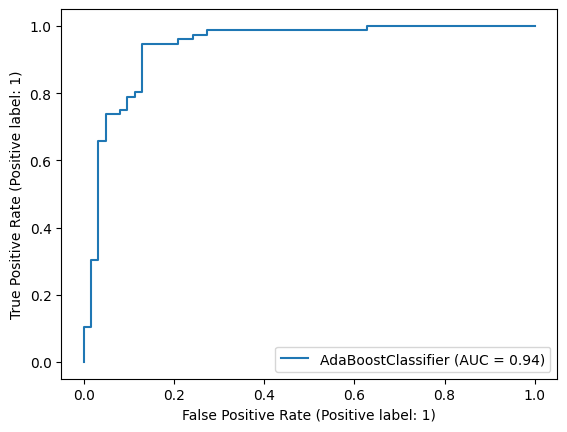

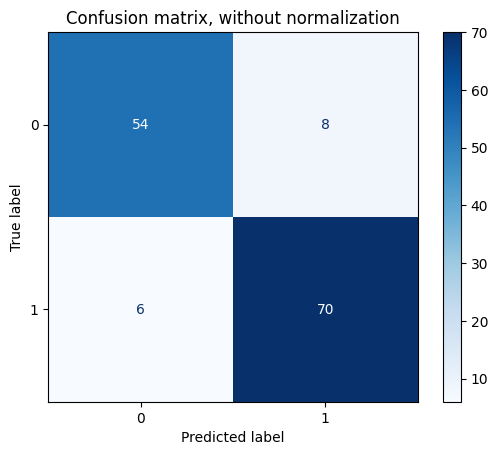

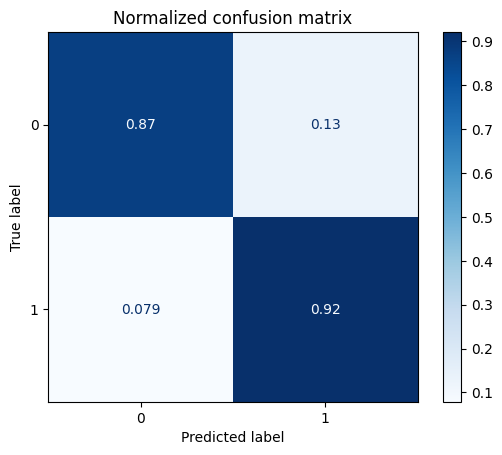

In [ ]:
show_graph_ROCAUC(abc2,X_test,y_test)
show_graph_confMATRIX(abc2,X_test,y_test)

In [ ]:
xgb=XGBClassifier()

model = xgb.fit(X_train, y_train)

y_pred = model.predict(X_test)

eval_model_synthetic(y_test, y_pred)

print('Parameters currently in use:\n')
print(xgb.get_params())

              precision    recall  f1-score   support

           0       0.89      0.82      0.86        62
           1       0.86      0.92      0.89        76

    accuracy                           0.88       138
   macro avg       0.88      0.87      0.87       138
weighted avg       0.88      0.88      0.88       138

Parameters currently in use:

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estim

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

xgb_model = XGBClassifier()

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5}
Best score:  0.8628205128205128


In [ ]:
#we can use the parameters above
xgb=XGBClassifier(max_depth=3, learning_rate=0.1, subsample = 1)

model = xgb.fit(X_train, y_train)

y_pred = model.predict(X_test)

eval_model_synthetic(y_test, y_pred) #with an increase in the performance

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        62
           1       0.89      0.92      0.90        76

    accuracy                           0.89       138
   macro avg       0.89      0.89      0.89       138
weighted avg       0.89      0.89      0.89       138



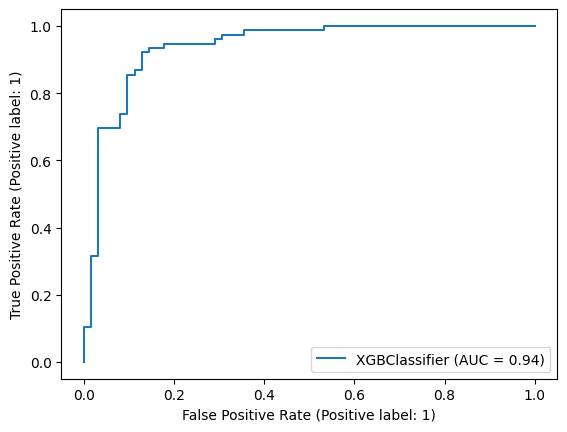

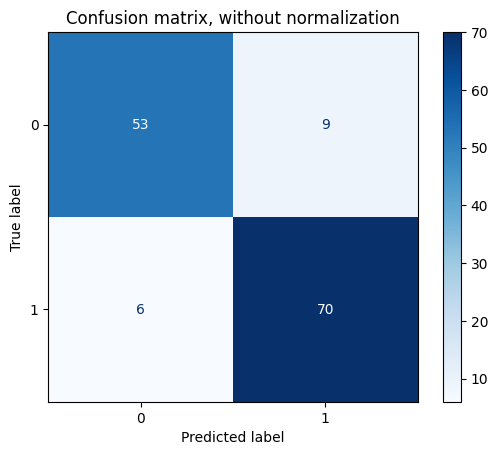

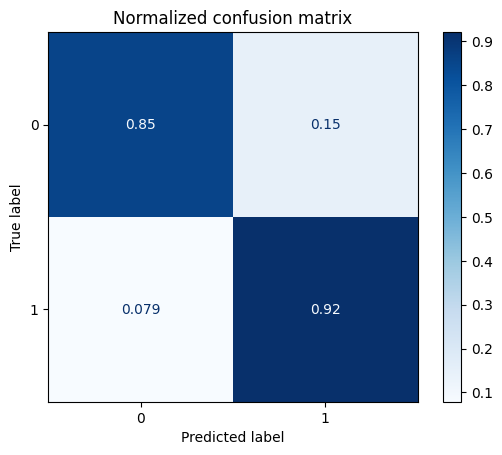

In [ ]:
show_graph_ROCAUC(xgb,X_test,y_test)
show_graph_confMATRIX(xgb,X_test,y_test)

# Gaussian Naive Bayes

The assumption of independent features is a disadvantage. In practice, it is almost impossible that model will get a set of predictors which are entirely independent.
If there is no training tuple of a particular class, this causes zero posterior probability. In this case, the model is unable to make predictions. This problem is known as Zero Probability/Frequency Problem.


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

eval_model_synthetic(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        62
           1       0.88      0.86      0.87        76

    accuracy                           0.86       138
   macro avg       0.85      0.86      0.85       138
weighted avg       0.86      0.86      0.86       138



In [ ]:
print('Parameters currently in use:\n')
print(gnb.get_params())

Parameters currently in use:

{'priors': None, 'var_smoothing': 1e-09}


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
    'priors': [None, [0.5, 0.5]]
}

gscv = GridSearchCV(gnb, param_grid, cv=5)

# Fit the model to the training data
gscv.fit(X_train, y_train)

# Get the best hyperparameters
best_params = gscv.best_params_
print(best_params)

{'priors': [0.5, 0.5], 'var_smoothing': 1e-09}


In [ ]:
# Create a new Gaussian Naive Bayes model with the best hyperparameters
gnb = GaussianNB(var_smoothing = 1e-09, priors = [0.5, 0.5])
gnb.fit(X_train, y_train)
# Evaluate the model on the test data
y_pred = gnb.predict(X_test)

eval_model_synthetic(y_test,y_pred) #which gave us pretty the same results as before

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        59
           1       0.83      0.91      0.86        53

    accuracy                           0.87       112
   macro avg       0.87      0.87      0.87       112
weighted avg       0.87      0.87      0.87       112



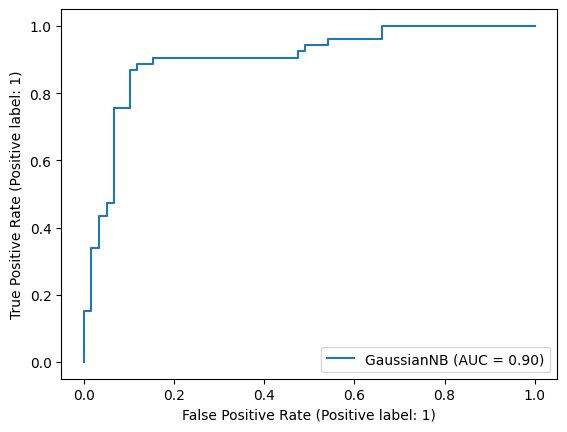

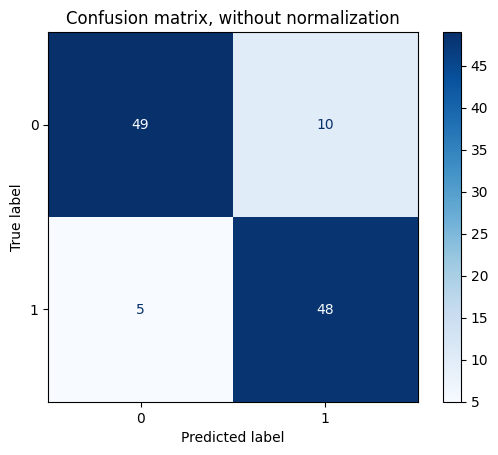

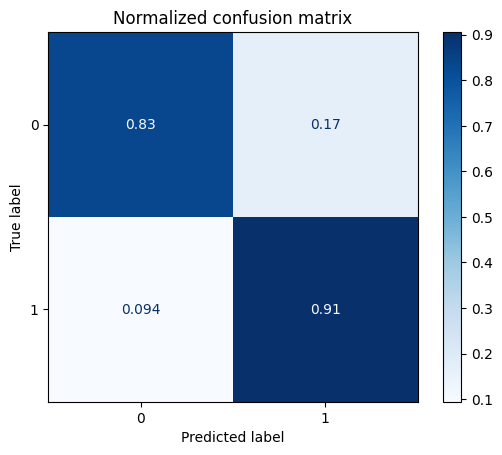

In [ ]:
show_graph_ROCAUC(gnb,X_test,y_test)
show_graph_confMATRIX(gnb,X_test,y_test)

# DL
Traditional machine learning algorithms, such the ones implemented before as support vector machines, decision trees, and random forests, rely on feature engineering and a set of predetermined characteristics to classify data. These methods are effective for many tasks, particularly when dealing with structured and relatively small datasets.

On the other hand, deep learning, involves neural networks with multiple layers (deep neural networks) to automatically learn hierarchical representations from data. This approach excels in capturing intricate features and relationships within large and unstructured datasets, so we espect to be less efficient or prone to overfitting if we use the same dataset.

1.   (done) [MLP](https://www.linkedin.com/pulse/understanding-mlp-classifiers-powerful-tool-machine-learning-singh/) - One such powerful algorithm is the Multilayer Perceptron (MLP) classifier. I consists of multiple layers of interconnected artificial neurons, also known as perceptrons. These layers typically include an input layer, one or more hidden layers, and an output layer. Each neuron in the network receives input signals, applies a non-linear activation function, and passes the transformed output to the next layer. This process continues until the final layer, which produces the classification output.

In [ ]:
#@title MLP
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(verbose=True) #default parameters but in order to see the iteration and loss setting verbose to true

learm = clf.fit(X_train,y_train)

Iteration 1, loss = 15.43556822
Iteration 2, loss = 6.58446941
Iteration 3, loss = 3.85667796
Iteration 4, loss = 5.17070990
Iteration 5, loss = 2.92468155
Iteration 6, loss = 2.84274049
Iteration 7, loss = 2.60055448
Iteration 8, loss = 1.90846344
Iteration 9, loss = 1.84301570
Iteration 10, loss = 1.38455554
Iteration 11, loss = 1.19311440
Iteration 12, loss = 0.98894669
Iteration 13, loss = 0.82781537
Iteration 14, loss = 0.87381710
Iteration 15, loss = 0.75924966
Iteration 16, loss = 0.75837550
Iteration 17, loss = 0.75182412
Iteration 18, loss = 0.71315322
Iteration 19, loss = 0.71630380
Iteration 20, loss = 0.68205000
Iteration 21, loss = 0.66000326
Iteration 22, loss = 0.64217643
Iteration 23, loss = 0.62404915
Iteration 24, loss = 0.60807816
Iteration 25, loss = 0.59127594
Iteration 26, loss = 0.57587070
Iteration 27, loss = 0.56265846
Iteration 28, loss = 0.55838751
Iteration 29, loss = 0.53214486
Iteration 30, loss = 0.52813182
Iteration 31, loss = 0.51479337
Iteration 32, lo

In [ ]:
ypred=clf.predict(X_test)

eval_model_synthetic(y_test,ypred) #which is low compared to ML approaches but we can try with a little bit of finetuning to understand how it could be improved

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        59
           1       0.84      0.89      0.86        53

    accuracy                           0.87       112
   macro avg       0.87      0.87      0.87       112
weighted avg       0.87      0.87      0.87       112



In [ ]:
from sklearn._config import get_config, set_config

set_config(print_changed_only=False)

clf

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [ ]:
grid = {'solver': ['lbfgs', 'sgd', 'adam'], 'activation': ['identity', 'logistic', 'tanh', 'relu']} #with gridsearch we can try different paramether for the solver
#and for the activation, instead for the others we can set them differently from before
clf_cv = GridSearchCV(
    MLPClassifier(random_state=1, max_iter=5000, hidden_layer_sizes=(3,3), alpha=1e-5),
    grid, #the parameter to search
    n_jobs=-1, #is to define how many CPU cores of computer to use (-1 is for all the cores available)
    cv=10 #is the number of splits for cross-validation
    )

clf_cv.fit(X_train, y_train)

print("Top: ",clf_cv.best_params_)
best_config_gs = clf_cv.best_params_

print(clf_cv.best_score_)

Top:  {'activation': 'identity', 'solver': 'lbfgs'}
0.859375


In [ ]:
#since is higher than before we can try to report it in a new classifier
clf = MLPClassifier(random_state=1, max_iter=5000, hidden_layer_sizes=(3,3), alpha=1e-5,activation='identity', solver='lbfgs')

learm = clf.fit(X_train,y_train)
ypred=clf.predict(X_test)

eval_model_synthetic(y_test,ypred) #actually higher than the predicted before

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        59
           1       0.90      0.87      0.88        53

    accuracy                           0.89       112
   macro avg       0.89      0.89      0.89       112
weighted avg       0.89      0.89      0.89       112



# Thank you.